# Hann-Poisson Window

$$
w[n] = 0.5
\bigg(1 - \cos\big(\frac{\pi n}{M}\big)\bigg)
e^{-\alpha \frac{|n - M|}{M}};
M = \frac{N - \mathrm{1}_{symmetric}}{2}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as dsp
from scipy import fft
import IPython.display as display
from zplot import zplot
from compare import compare

In [2]:
def hannpoisson(N, sym=False, alpha=1.0):
    """
    Return a Exponential (Poission) window.

    Args:
        N: Number of points in the output window. 
        If zero or less, an empty array is returned.
        sym: When True (default), generates a symmetric window, 
        for use in filter design. When False, generates a 
        periodic window, for use in spectral analysis.

    Returns:
        the Exponential (Poission) window of length N with given symmetry

    """
    n = np.arange(N)
    N = (N - 1 if sym else N) / 2
    return 0.5 * (1 - np.cos(np.pi * n / N)) * np.exp(-alpha * abs(n - N) / N)

In [3]:
list(hannpoisson(7, False, 0.5))

[0.0,
 0.13171692284055647,
 0.4933591709408724,
 0.8849606791400177,
 0.8849606791400177,
 0.49335917094087245,
 0.13171692284055656]

In [4]:
list(hannpoisson(8, False, 0.5))

[0.0,
 0.10065118456053207,
 0.3894003915357024,
 0.7532582233891434,
 1.0,
 0.7532582233891435,
 0.38940039153570255,
 0.10065118456053211]

In [5]:
list(hannpoisson(7, True, 0.5))

[0.0,
 0.1791328276434473,
 0.6348612936679605,
 1.0,
 0.6348612936679607,
 0.17913282764344732,
 0.0]

In [6]:
list(hannpoisson(8, True, 0.5))

[0.0,
 0.13171692284055647,
 0.4933591709408724,
 0.8849606791400177,
 0.8849606791400177,
 0.49335917094087245,
 0.13171692284055656,
 0.0]

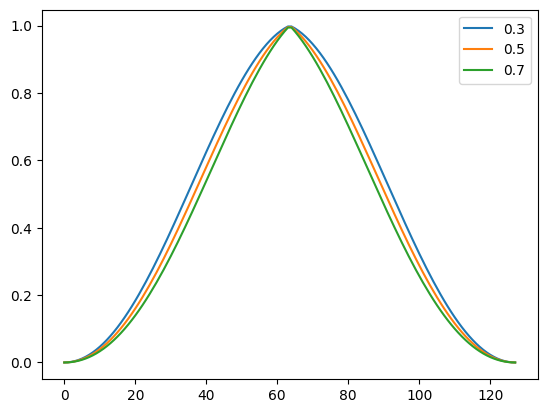

In [7]:
plt.plot(list(hannpoisson(128, True, 0.3)), label='0.3')
plt.plot(list(hannpoisson(128, True, 0.5)), label='0.5')
plt.plot(list(hannpoisson(128, True, 0.7)), label='0.7')
plt.legend()

## Asymmetric

### Odd

In [8]:
# test, reference = compare(7, hannpoisson, dsp.hannpoisson, False)

In [9]:
# _ = dsp.freqz(test, plot=zplot)

In [10]:
# list(test)

In [11]:
# list(reference)

### Even

In [12]:
# test, reference = compare(8, hannpoisson, dsp.hannpoisson, False)

In [13]:
# _ = dsp.freqz(test, plot=zplot)

In [14]:
# list(test)

In [15]:
# list(reference)

## Symmetric

### Odd

In [16]:
# test, reference = compare(7, hannpoisson, dsp.hannpoisson, True)

In [17]:
# _ = dsp.freqz(test, plot=zplot)

In [18]:
# list(test)

In [19]:
# list(reference)

### Even

In [20]:
# test, reference = compare(8, hannpoisson, dsp.hannpoisson, True)

In [21]:
# _ = dsp.freqz(test, plot=zplot)

In [22]:
# list(test)

In [23]:
# list(reference)

## Coherent Gain

In [24]:
hannpoisson(1024, False, 0.3).mean()

0.45818791079634913

In [25]:
hannpoisson(1024, False, 0.5).mean()

0.43315807291758

In [26]:
hannpoisson(1024, False, 0.7).mean()

0.41014439343547426

## Side-lobe amplitude

(-71.68854669684694, 1.0)

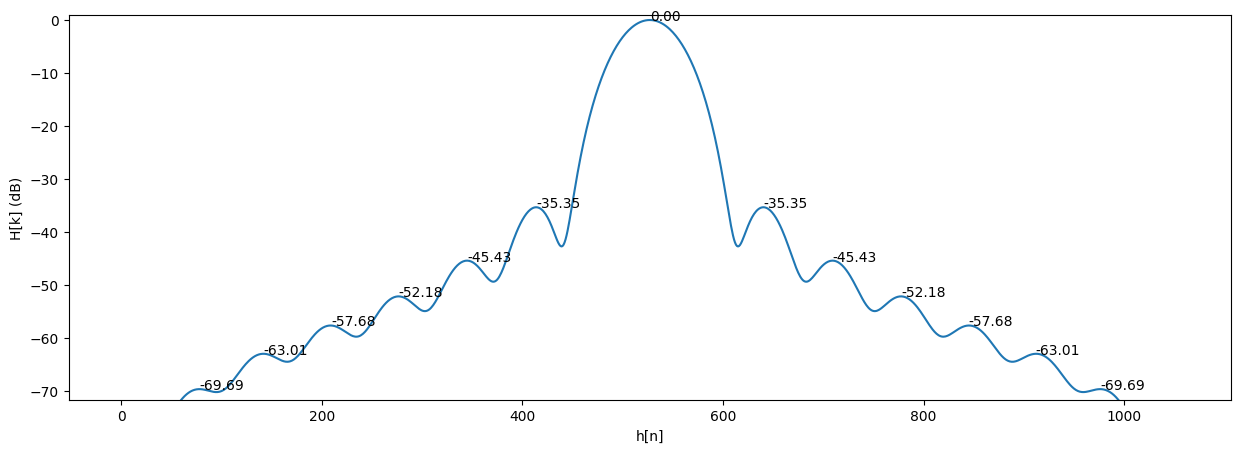

In [27]:
w = hannpoisson(31, False, 0.5)
w = np.pad(w, (512, 512))
H = fft.fft(w)
H = fft.fftshift(H)
H = 20 * np.log10(np.abs(H) + 1e-12)
H = H - H.max()
peaks, _ = dsp.find_peaks(H)
ymin = H[peaks[len(peaks)//2:]][-1] - 1
plt.figure(figsize=(15, 5))
plt.plot(H)
for x, y in zip(peaks, H[peaks]):
    if y > ymin:
        plt.text(x, y, f'{y:.2f}')
plt.ylabel('H[k] (dB)')
plt.xlabel('h[n]')
plt.ylim(ymin - 1, 1)
# sorted(H[peaks], reverse=True)[1]